# Loading results

In [1]:
%run common_init.py

Start import
Host: stbc-i1.nikhef.nl
Setting tmp folder to /tmp/
calculating effective efficiency for Xe detector done
calculating effective efficiency for Ge detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Xe_migd detector done
calculating effective efficiency for Ge_migd detector done
calculating effective efficiency for Ar_migd detector done
Done import
SYSTEM
	Running on linux
	Python version 3.8.1 (default, Jan  8 2020, 22:29:32) [GCC 7.3.0]
	Python installation /project/xenon/jorana/software/miniconda3/envs/dddm2/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/project/xenon/jorana/software/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/project/xenon/jorana/software/wimprates/wimprates/



In [2]:
import multihist as mh

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle
import scipy.optimize

In [4]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [5]:
path = dddm.context['results_dir']
!ls $path | wc -l

784


In [6]:
# loading normal results.
# from IPython.utils import io
results = {}
all_res = dddm.context['results_dir']
res_dirs = os.listdir(all_res)
no_result = []
load_errors = []
for i, resdir in enumerate(tqdm(res_dirs)):
    try:
        result = dddm.load_multinest_samples_from_file(all_res+'/'+resdir+'/');
    except:
            e = sys.exc_info()[0]
            print(f'Error {e} in loading {resdir}')
            load_errors.append([i, all_res + '/' + resdir, e])
            continue
    if len(result.keys()):
            result['dir'] = all_res+'/'+resdir + '/'
            results[i] = result
    else:
        no_result.append(all_res+'/'+resdir+'/')

100%|██████████| 784/784 [00:58<00:00, 13.50it/s]


In [7]:
no_result, load_errors

(['/dcache/xenon/jorana/dddm/results//nested_multinest_HASH783aed4bb440cedd4/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest_HASH182fc82c98e24324d/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3716/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest_HASH29e19b13042d994c8/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3728/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3732/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3734/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3736/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3737/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3738/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3739/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3740/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3742/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3744/',
  '/dcache/xenon/jorana/dddm/results//nested_multinest3746/',
  '/dcache/xenon

In [8]:
def results_to_df(res):
    df = pd.DataFrame()
    items = sorted(list(res.keys()))
    df['item'] = items
    for key in res[np.min(list(res.keys()))].keys():
        if key in ['samples', 'weights', 'weightedsamples']:
            continue
        if key == 'config' or key == 'res_dict':
            for sub_key in res[items[0]][key].keys():
                if sub_key == 'prior':
                    for sub_sub_key in res[items[0]][key][sub_key].keys():
                        if type(res[items[0]][key][sub_key][sub_sub_key]) == dict:
                            for sub_sub_sub_key in res[items[0]][key][sub_key][sub_sub_key].keys():
                                df[key+'_'+sub_key+'_'+sub_sub_key+'_'+sub_sub_sub_key] = [res[it][key][sub_key][sub_sub_key][sub_sub_sub_key] for it in items]
                        else:
                            df[key+'_'+sub_key+'_'+sub_sub_key] = [res[it][key][sub_key][sub_sub_key] for it in items]
                else:
                    try:
                        df[key+'_'+sub_key] = [res[it][key][sub_key] for it in items]
                    except KeyError:
                        pass
            
        else:
            try:
                df[key] = [res[it][key] for it in items]
            except KeyError:
                pass
        
            
    df['mw'] = 10 ** df['config_mw']
    df['n_fit_parameters'] = [len(pars) for pars in df['config_fit_parameters']]
    return df
df = results_to_df(results)
df.head(5)

item config_detector  config_poisson  config_n_energy_bins  config_earth_shielding  config_save_intermediate config_prior_log_mass_range config_prior_log_mass_prior_type config_prior_log_mass_param                         config_prior_log_mass_dist config_prior_log_cross_section_range config_prior_log_cross_section_prior_type config_prior_log_cross_section_param                config_prior_log_cross_section_dist config_prior_density_range config_prior_density_prior_type  config_prior_density_mean  config_prior_density_std config_prior_density_param                          config_prior_density_dist config_prior_v_0_range config_prior_v_0_prior_type  config_prior_v_0_mean  config_prior_v_0_std config_prior_v_0_param                              config_prior_v_0_dist config_prior_v_esc_range config_prior_v_esc_prior_type  config_prior_v_esc_mean  config_prior_v_esc_std config_prior_v_esc_param                            config_prior_v_esc_dist config_prior_k_range  \
0     0         Xe_migd           False                    10                   False                      True                     [-2, 1]                             flat                     [-2, 1]  <function get_priors.<locals>.<lambda> at 0x7f...                           [-42, -38]                                      flat                           [-42, -38]  <function get_priors.<locals>.<lambda> at 0x7f...               [0.001, 0.9]                           gauss                       0.55                       0.1                (0.55, 0.1)  <function get_priors.<locals>.<lambda> at 0x7f...              [80, 380]                       gauss                    233                     3               (233, 3)  <function get_priors.<locals>.<lambda> at 0x7f...               [379, 709]                         gauss                      528                    24.5              (528, 24.5)  <function get_priors.<locals>.<lambda> at 0x7f...           [0.5, 3.5]   
1     1         Xe_migd           False                    10                    True                      True                     [-2, 1]                             flat                     [-2, 1]  <function get_priors.<locals>.<lambda> at 0x7f...                           [-42, -38]                                      flat                           [-42, -38]  <function get_priors.<locals>.<lambda> at 0x7f...               [0.001, 0.9]                           gauss                       0.55                       0.1                (0.55, 0.1)  <function get_priors.<locals>.<lambda> at 0x7f...              [80, 380]                       gauss                    233                     3               (233, 3)  <function get_priors.<locals>.<lambda> at 0x7f...               [379, 709]                         gauss                      528                    24.5              (528, 24.5)  <function get_priors.<locals>.<lambda> at 0x7f...           [0.5, 3.5]   
2     2         Xe_migd           False                    10                    True                      True                     [-2, 1]                             flat                     [-2, 1]  <function get_priors.<locals>.<lambda> at 0x7f...                           [-42, -38]                                      flat                           [-42, -38]  <function get_priors.<locals>.<lambda> at 0x7f...               [0.001, 0.9]                           gauss                       0.55                       0.1                (0.55, 0.1)  <function get_priors.<locals>.<lambda> at 0x7f...              [80, 380]                       gauss                    233                     3               (233, 3)  <function get_priors.<locals>.<lambda> at 0x7f...               [379, 709]                         gauss                      528                    24.5              (528, 24.5)  <function get_priors.<locals>.<lambda> at 0x7f...           [0.5, 3.5]   
3     3         Xe_migd           False                    10          

In [9]:
def delete_with_note(df, note, delete = False):
    mask = df.config_notes == note
    paths = df[mask]['dir']
    for path in paths:
        cmd = f"rm -rf {path}"
        print(cmd)
        if delete:
            os.system(cmd)

def delete_with_mask(df, mask, delete = False):
    paths = df[mask]['dir']
    for path in tqdm(paths):
        cmd = f"rm -rf {path}"
        print(cmd)
        if delete:
            os.system(cmd)


In [10]:
all_notes = np.unique(df.config_notes.values)
all_notes

array(['2020_02_16_22h_sanity_highsigma10', '20_02_12_multicore_test-n10',
       '20_02_12_multicore_test-n20', '20_02_13_n10', '20_02_13_n20',
       '20_02_14_long', 'multinest_save_intm_0203-12',
       'multinest_save_intm_0203-13', 'multinest_save_intm_0203-14',
       'multinest_save_intm_0203-21', 'multinest_save_intm_0203-28',
       'multinest_save_intm_0203-40', 'multinest_save_intm_0203-42',
       'multinest_save_intm_0203-47', 'multinest_save_intm_0203-66',
       'multinest_save_intm_0203-67', 'multinest_save_intm_0203-69',
       'multinest_save_intm_0203-8', 'multinest_save_intm_0203-9',
       'multinest_save_intm_2601-100', 'multinest_save_intm_2601-101',
       'multinest_save_intm_2601-102', 'multinest_save_intm_2601-103',
       'multinest_save_intm_2601-104', 'multinest_save_intm_2601-106',
       'multinest_save_intm_2601-107', 'multinest_save_intm_2601-108',
       'multinest_save_intm_2601-109', 'multinest_save_intm_2601-110',
       'multinest_save_intm_2601-

In [11]:
mask = df.config_nlive.values < 300
delete_with_mask(df, mask, delete=False)

100%|██████████| 102/102 [00:00<00:00, 46951.16it/s]

rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASHa9065621a04693ca3/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH7819132d05c3d87c0/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH58453b9ffe12150f2/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASHe990d303565db731d/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASHba4773f886adbca03/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASHfb15b636f5af3d8f9/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH18ec54cae556f138a/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH3b2f43ea6b21b83c1/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH1aac3c37ee05dc56f/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH4a760a9684428464c/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASHd8cd2a2a07f2594a1/
rm -rf /dcache/xenon/jorana/dddm/results//nested_multinest_HASH2b62dce4761558235/
rm -rf /dcache/x

In [12]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [13]:
def bin_center(xedges, yedges):
    return 0.5 * (xedges[0:-1] + xedges[1:]), 0.5 * (yedges[0:-1] + yedges[1:])
    

In [14]:
def get_hist(item, nbins = 45, bin_range = None):
#     nbins = 45
#     bin_range = [[1, 3], [-46, -44]]
    if bin_range == None:
        bin_range = [results[item]['config']['prior']['log_mass']['range'],
                 results[item]['config']['prior']['log_cross_section']['range']
                ]
    counts, xedges, yedges = np.histogram2d(*get_p_i(item), bins = nbins, range = bin_range)
    return counts , xedges, yedges

def get_hist_norm(item):
    counts , xedges, yedges = get_hist(item)
    return counts/np.sum(counts) , xedges, yedges

In [15]:
def get_p_i(i):
#     m, sig = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
    m, sig = results[i]['weighted_samples'].T[:2]
    
    return np.array([m, sig])

In [16]:
from matplotlib.colors import LogNorm
def combine_normalized(items, **plot_kwargs):
    X, Y = np.meshgrid(*get_hist_norm(items[0])[1:])
    for i in items:
        c,_,_ = get_hist_norm(i)
        im = plt.pcolor(X,Y,c.T, norm=LogNorm(vmin = 1e-4,vmax = 1),**plot_kwargs)  
    plt.colorbar()

In [17]:
def pow10(x):
    return 10 ** x

In [18]:
def confidence_plot(items, text_box = False, bin_range = None, nsigma = 2, nbins = 50):
    fig,ax=plt.subplots(figsize = (8,6))
    if bin_range == None:
        bin_range = [results[items[0]]['config']['prior']['log_mass']['range'],
                 results[items[0]]['config']['prior']['log_cross_section']['range']
                ]
    
    for k, item in enumerate(items):#, 78, 110 
        x,y =get_p_i(item)
        # Make a 2d normed histogram
        H,xedges,yedges=np.histogram2d(x,y,bins=nbins, range = bin_range, normed=True)
        norm=H.sum() # Find the norm of the sum
        # Set contour levels
        contour3=0.99
        contour2=0.95
        contour1=0.68
        # Take histogram bin membership as proportional to Likelihood
        # This is true when data comes from a Markovian process
        def objective(limit, target):
            w = np.where(H>limit)
            count = H[w]
            return count.sum() - target
        target1 = norm*contour1
        level1= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target1,))
        levels=[level1]
        if nsigma>1:
            target2 = norm*contour2
            level2= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target2,))
            levels.append(level2)
            if nsigma>2:
                target3 = norm*contour3
                level3= scipy.optimize.bisect(objective, H.min(), H.max(), args=(target3,))    
                levels.append(level3)
            if nsigma>3:
                print('Nsigma too big')
        levels.reverse()
        levels.append(H.max())
        # Find levels by summing histogram to objective
        
        # Pass levels to normed kde plot
        def av_levels(x):
            return [(x[i] + x[i+1])/2 for i in range(len(x)-1)]

        if levels[0]==levels[1]:
            print("ERRRRRRRRR\n\n")
            print(levels)
            levels[0] /= 1.01
            levels = np.unique(levels)
            print(levels)
        sns_ax = sns.kdeplot(x,y, shade=True,ax=ax,n_levels=levels,cmap="viridis",normed=True, 
                    cbar = False, vmin=levels[0], vmax=levels[-1])
        kwargs = {}
        if k == 0:
            kwargs['label'] = 'best fit'
        plt.scatter(np.mean(x),np.mean(y), c='black',
                    marker = '+',**kwargs)
        if k == 0:
            kwargs['label'] = 'benchmark value'
        plt.scatter(results[item]['config']['mw'],
                    results[item]['config']['sigma'], c='blue',
                    marker = 'x',
                    **kwargs)
        if k == 0:
            cbar = ax.figure.colorbar(sns_ax.collections[0])
            cbar.set_ticks(av_levels(np.linspace(0,1,nsigma+1)))
            col_labels = ['$3\sigma$', '$2\sigma$', '$1\sigma$'][3-nsigma:]
            cbar.set_ticklabels(col_labels)
            cbar.set_label("Posterior probability")
    secax = ax.secondary_xaxis('top', functions=(pow10, np.log10))
    if 'migd' in results[items[0]]['config']['detector']:
        x_ticks = [0.01, 0.1, 1, 3]
    else:
        x_ticks = [15, 25, 50, 100, 250, 500, 1000]
    for x_tick in x_ticks:
        ax.axvline(np.log10(x_tick), alpha = 0.1)
    secax.set_ticks(x_ticks)
    plt.xlim(np.log10(x_ticks[0]),np.log10(x_ticks[-1]))
    plt.xlabel("$\log_{10}(M_{\chi}$ $[GeV/c^{2}]$)")
    secax.set_xlabel("$M_{\chi}$ $[GeV/c^{2}]$")
    plt.ylabel("$\log_{10}(\sigma_{S.I.}$ $[cm^{2}]$)")
    plt.legend(loc = 'upper right')

    if text_box:
        plt.text(0.05, 0.95, text_box, 
                 bbox=dict(facecolor="white",
                           boxstyle="round"), 
                 transform=ax.transAxes,
                 alpha=0.5)

In [19]:
show_items = ['item','mw', 'config_sigma', #'res_dict_nestle_nposterior',
                   'config_notes', 'config_halo_model', 'n_fit_parameters', 'config_nlive']# 'res_dict_nestle_time']

In [20]:
def find_largest_posterior(df, sig = -38, mw = 1, fix_nlive= None):
    items = []
    for nparam in [2,5]:
        for halo in ['shm', 'shielded_shm']:
            mask = (
                (df['n_fit_parameters'] == nparam) & 
                (df['config_halo_model'] == halo) &
                (df['mw'] == mw) &
                (df['config_sigma'] == sig))
            if fix_nlive:
                mask = mask & (df['config_nlive'] == fix_nlive)
            sel_df = df[mask].sort_values('config_nlive')
            
            maskA = sel_df['config_halo_model'] == 'shielded_shm'
            maskB = np.array(['VerneSHM' in model for model in sel_df['config_halo_model'].values])
            mask2 = maskA | maskB
            print(np.sum(maskA), np.sum(maskB), np.sum(mask2))
            if halo == 'shielded_shm':
                sel_df = sel_df[mask2]
            else:
                sel_df = sel_df[~mask2]
            print(f'{halo} for {nparam} pars @ s = {sig}, m = {mw}')
            if len(sel_df):
                print(sel_df[['item', 'mw', 'config_sigma', 'config_nlive']][-2:-1])
                items.append(sel_df['item'].values[-1])
    return items
    
    

In [21]:
mask = np.array(['2601' in note for note in df.config_notes])
selections = [find_largest_posterior(df[~mask], *sigmw) for sigmw in [[-40,1], [-39, 0.5], [-39, 0.1]]]
selections

0 0 0
shm for 2 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
275   275  1.0         -40.0           750
6 0 6
shielded_shm for 2 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
340   340  1.0         -40.0           500
0 0 0
shm for 5 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
637   655  1.0         -40.0           500
1 0 1
shielded_shm for 5 pars @ s = -40, m = 1
Empty DataFrame
Columns: [item, mw, config_sigma, config_nlive]
Index: []
0 0 0
shm for 2 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
364   364  0.5         -39.0          1000
12 0 12
shielded_shm for 2 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
376   376  0.5         -39.0          1000
0 0 0
shm for 5 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
456   456  0.5         -39.0           750
8 0 8
shielded_shm for 5 pars @ s = -39, m = 0.5
     item   mw  config_sigma  config_nlive
461   461  0.5   

[[320, 363, 448, 460], [409, 422, 462, 466], [404, 423, 436, 467]]

In [22]:
show_items = [#'item',
 'mw',
 'config_sigma',
 'config_halo_model',
 'npar',
 'config_nlive']

In [23]:
df_at_mw_sig = pd.concat([df[df['item'] == item] for item in selections[0]])
df_at_mw_sig['npar'] = df_at_mw_sig['n_fit_parameters']
# df_at_mw_sig['mass_fit'] = df_at_mw_sig['res_dict_mass_fit_res']
# df_at_mw_sig['cross_section'] = df_at_mw_sig['res_dict_cross_section_fit_res']
# df_at_mw_sig[show_items+['mass_fit', 'cross_section', 'config_fit_time']]

In [24]:
df_at_mw_sig = pd.concat([df[df['item'] == item] for item in selections[1]])
df_at_mw_sig['npar'] = df_at_mw_sig['n_fit_parameters']
# df_at_mw_sig['mass_fit'] = df_at_mw_sig['res_dict_mass_fit_res']
# df_at_mw_sig['cross_section'] = df_at_mw_sig['res_dict_cross_section_fit_res']
# df_at_mw_sig[show_items+['mass_fit', 'cross_section', 'config_fit_time']]

In [25]:
df_at_mw_sig = pd.concat([df[df['item'] == item] for item in selections[2]])
df_at_mw_sig['npar'] = df_at_mw_sig['n_fit_parameters']
# df_at_mw_sig['mass_fit'] = df_at_mw_sig['res_dict_mass_fit_res']
# df_at_mw_sig['cross_section'] = df_at_mw_sig['res_dict_cross_section_fit_res']
# df_at_mw_sig[show_items+['mass_fit', 'cross_section', 'config_fit_time']]

In [26]:
# from DirectDmTargets import get_param_list, get_prior_list
# import corner


In [27]:
df[['item','config_notes']]

item                 config_notes
0       0  multinest_save_intm_2601-13
1       1  multinest_save_intm_2601-55
2       2  multinest_save_intm_2601-56
3       3  multinest_save_intm_2601-19
4       4  multinest_save_intm_2601-62
..    ...                          ...
732   778               sanity_check20
733   779               sanity_check10
734   780               sanity_check20
735   782                 20_02_13_n20
736   783                 20_02_13_n20

[737 rows x 2 columns]

In [28]:
mask = df.config_notes.values == '20_02_12_multicore_test-n20'
for x in df[df.item == 484].keys():
    print(x)

item
config_detector
config_poisson
config_n_energy_bins
config_earth_shielding
config_save_intermediate
config_prior_log_mass_range
config_prior_log_mass_prior_type
config_prior_log_mass_param
config_prior_log_mass_dist
config_prior_log_cross_section_range
config_prior_log_cross_section_prior_type
config_prior_log_cross_section_param
config_prior_log_cross_section_dist
config_prior_density_range
config_prior_density_prior_type
config_prior_density_mean
config_prior_density_std
config_prior_density_param
config_prior_density_dist
config_prior_v_0_range
config_prior_v_0_prior_type
config_prior_v_0_mean
config_prior_v_0_std
config_prior_v_0_param
config_prior_v_0_dist
config_prior_v_esc_range
config_prior_v_esc_prior_type
config_prior_v_esc_mean
config_prior_v_esc_std
config_prior_v_esc_param
config_prior_v_esc_dist
config_prior_k_range
config_prior_k_prior_type
config_prior_k_param
config_prior_k_dist
config_v_0
config_v_esc
config_density
config_mw
config_sigma
config_halo_model
config

In [29]:
for x in results[484].keys():
    print(x)

res_dict
nested sampling global log-evidence error
marginals
global evidence error
config
weighted_samples
nested sampling global log-evidence
nested importance sampling global log-evidence error
modes
nested importance sampling global log-evidence
global evidence
dir


In [30]:
# [results[i]['weightedsamples'] for i in df[mask]['item'].values]

In [31]:
# for i in df[mask]['item'].values:
#     results[i]['weighted_samples'] = results[i]['weightedsamples'] 

In [32]:
sel_df = df[mask]

In [33]:
# sel_df['weighted_samples'] =[results[i]['weightedsamples'] for i in df[mask]['item'].values]
# sel_df

In [34]:
# mask = np.array(['san' in note for note in df.config_notes])
# selections = [find_largest_posterior(df[mask])] # for sigmw in [[-40,1], [-39, 0.5], [-39, 0.1]]]
# selections

In [35]:
import datetime

In [36]:
mask = [datetime.datetime(2020, 2, 16, 15, 0, 0, 0) <
    datetime.datetime.fromisoformat(d) for d in df.config_start.values]

In [37]:
# mask = ['san' in n for n in df.config_notes]
df[mask]

item config_detector  config_poisson  config_n_energy_bins  config_earth_shielding  config_save_intermediate config_prior_log_mass_range config_prior_log_mass_prior_type config_prior_log_mass_param                         config_prior_log_mass_dist config_prior_log_cross_section_range config_prior_log_cross_section_prior_type config_prior_log_cross_section_param                config_prior_log_cross_section_dist config_prior_density_range config_prior_density_prior_type  config_prior_density_mean  config_prior_density_std config_prior_density_param                          config_prior_density_dist config_prior_v_0_range config_prior_v_0_prior_type  config_prior_v_0_mean  config_prior_v_0_std config_prior_v_0_param                              config_prior_v_0_dist config_prior_v_esc_range config_prior_v_esc_prior_type  config_prior_v_esc_mean  config_prior_v_esc_std config_prior_v_esc_param                            config_prior_v_esc_dist config_prior_k_range  \
641   661         Xe_migd           False                    10                   False                     False                     [-2, 2]                             flat                     [-2, 2]  <function get_priors.<locals>.<lambda> at 0x7f...                           [-49, -32]                                      flat                           [-49, -32]  <function get_priors.<locals>.<lambda> at 0x7f...               [0.001, 0.9]                           gauss                       0.55                       0.5                (0.55, 0.5)  <function get_priors.<locals>.<lambda> at 0x7f...              [80, 380]                       gauss                    233                    90              (233, 90)  <function get_priors.<locals>.<lambda> at 0x7f...               [379, 709]                         gauss                      528                    99.0                (528, 99)  <function get_priors.<locals>.<lambda> at 0x7f...           [0.5, 3.5]   
642   670         Xe_migd           False                    10                   False                     False                     [-2, 3]                             flat                     [-2, 3]  <function get_priors.<locals>.<lambda> at 0x7f...                           [-50, -30]                                      flat                           [-50, -30]  <function get_priors.<locals>.<lambda> at 0x7f...               [0.001, 0.9]                           gauss                       0.55                       0.5                (0.55, 0.5)  <function get_priors.<locals>.<lambda> at 0x7f...              [80, 380]                       gauss                    233                    90              (233, 90)  <function get_priors.<locals>.<lambda> at 0x7f...               [379, 709]                         gauss                      528                    99.0                (528, 99)  <function get_priors.<locals>.<lambda> at 0x7f...           [0.5, 3.5]   
648   678         Xe_migd           False                    10                   False                     False                     [-2, 3]                             flat                     [-2, 3]  <function get_priors.<locals>.<lambda> at 0x7f...                           [-50, -30]                                      flat                           [-50, -30]  <function get_priors.<locals>.<lambda> at 0x7f...               [0.001, 0.9]                           gauss                       0.55                       0.5                (0.55, 0.5)  <function get_priors.<locals>.<lambda> at 0x7f...              [80, 380]                       gauss                    233                    90              (233, 90)  <function get_priors.<locals>.<lambda> at 0x7f...               [379, 709]                         gauss                      528                    99.0                (528, 99)  <function get_priors.<locals>.<lambda> at 0x7f...           [0.5, 3.5]   
652   685         Xe_migd           False                    10  

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
641  5.0         -43.0                 2               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


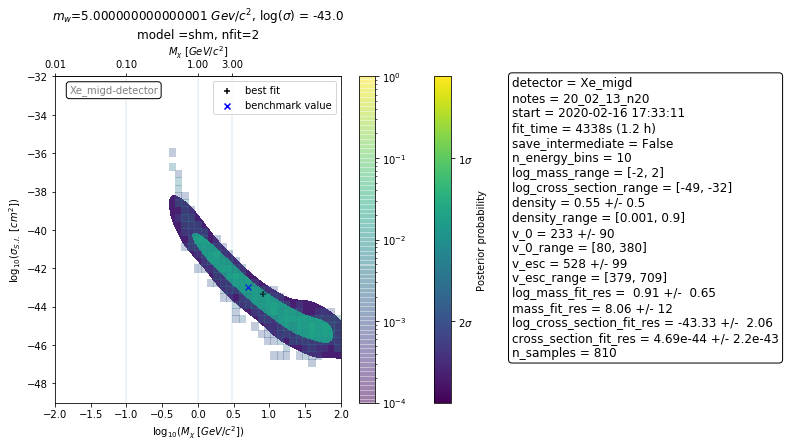

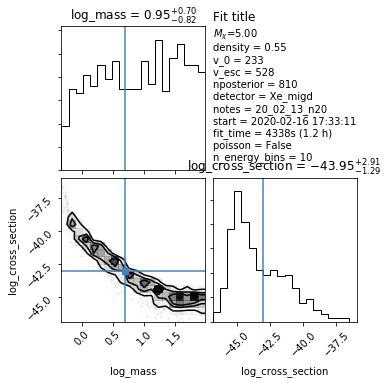

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
642  1.0         -37.0                 2               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


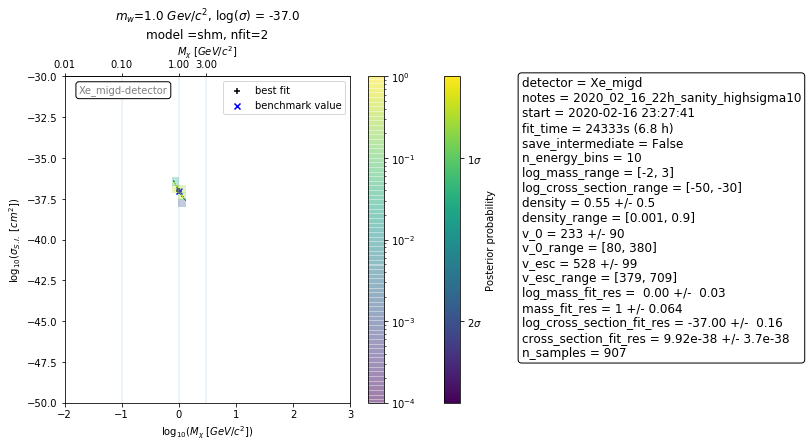

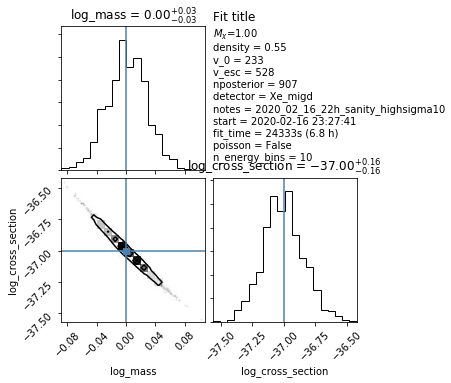

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
648  0.2         -32.0                 2               shm           300
ERRRRRRRRR


[0.06596306068649595, 0.06596306068649595, 0.197889182058048]
[0.06530996 0.06596306 0.19788918]


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


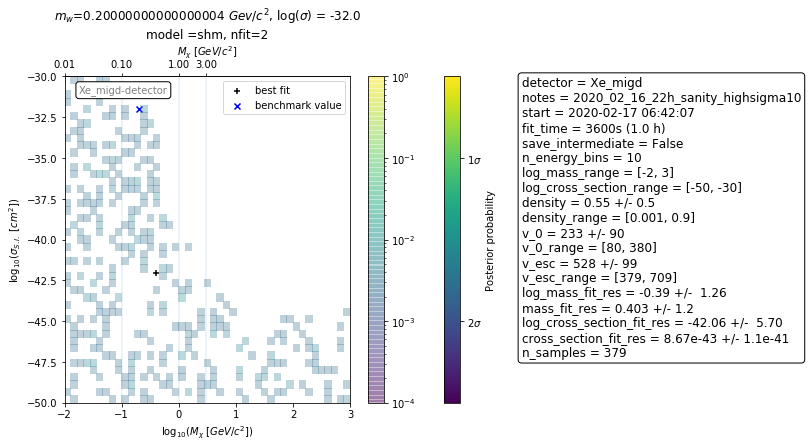

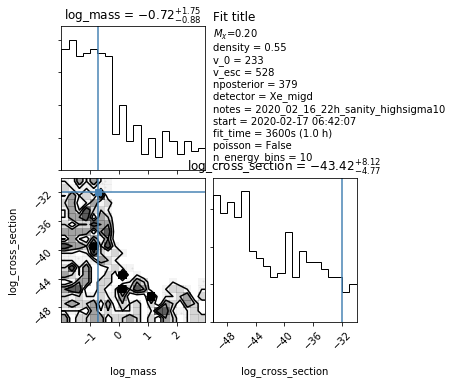

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
652  1.0         -42.0                 2               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


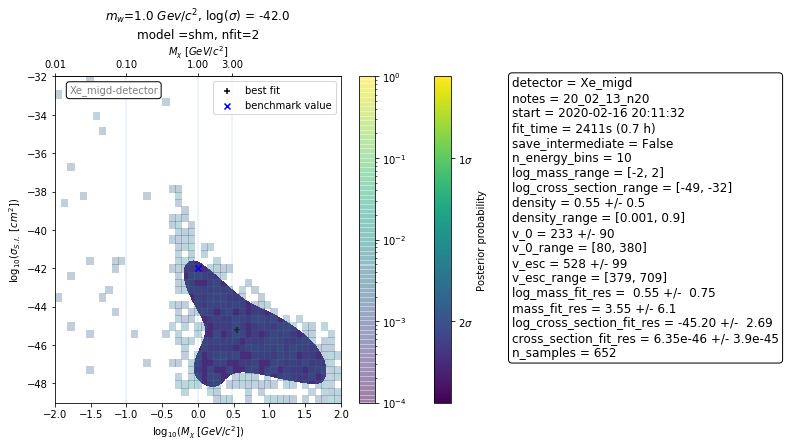

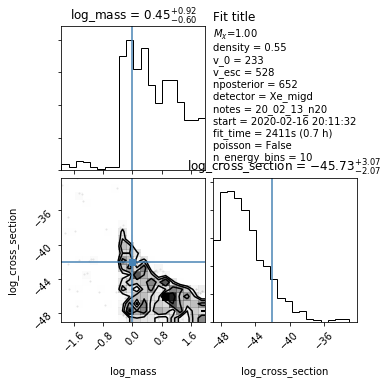

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
661  5.0         -42.0                 2               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


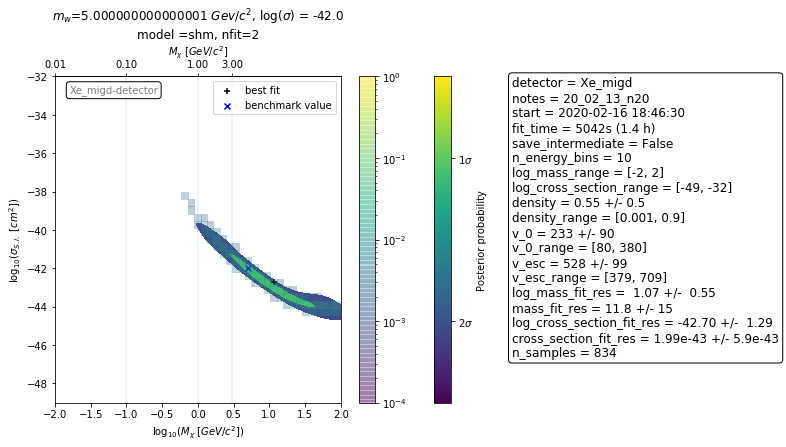

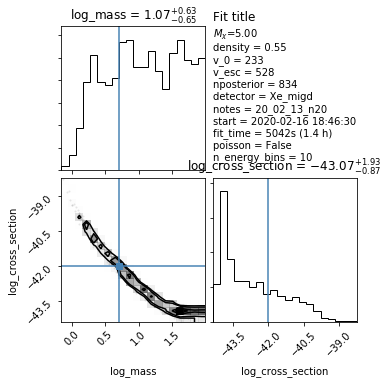

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
687  5.0         -44.0                 2               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


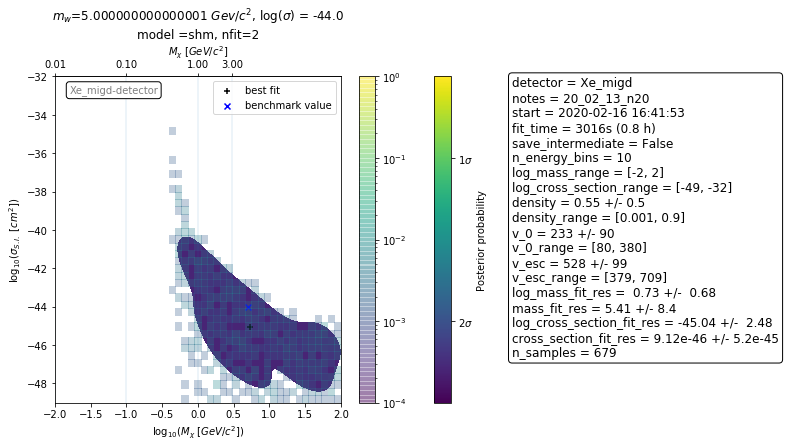

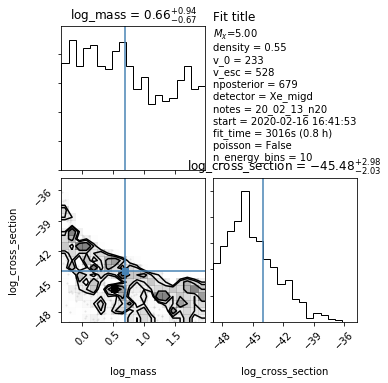

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
704  5.0         -39.0                 2               shm           300
ERRRRRRRRR


[12.245444801715173, 12.245444801715173, 12.647374062164868]
[12.12420277 12.2454448  12.64737406]


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


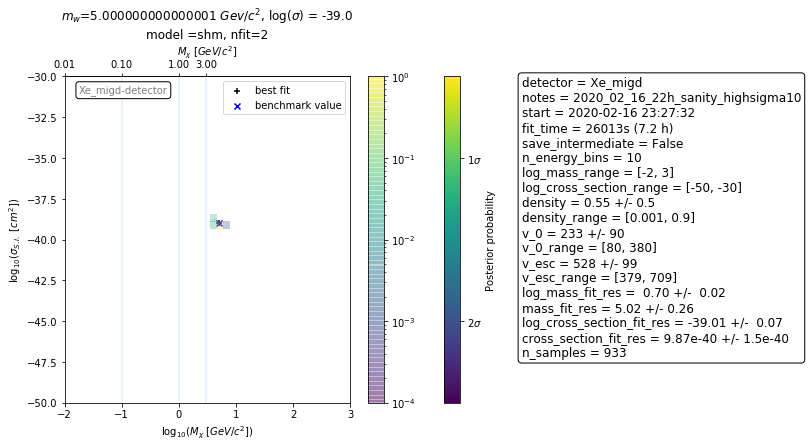

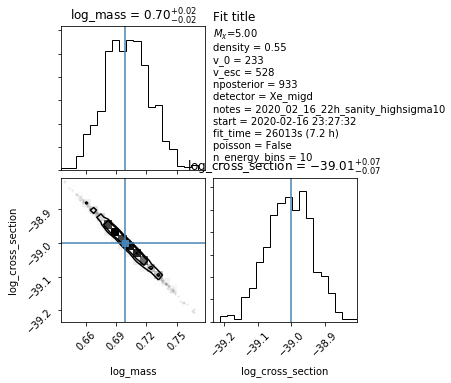

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
715  0.5         -34.0                 2               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


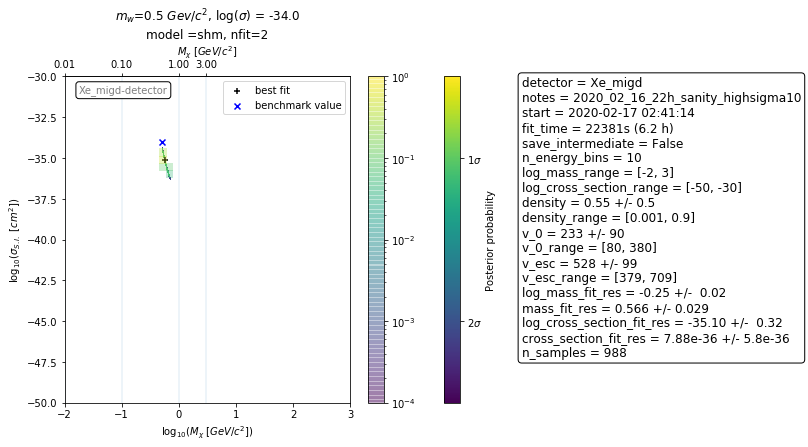

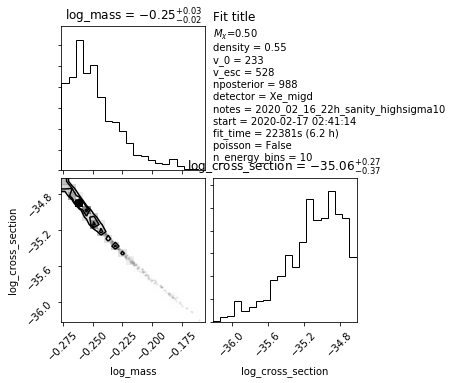

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
727  5.0         -43.0                 5               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


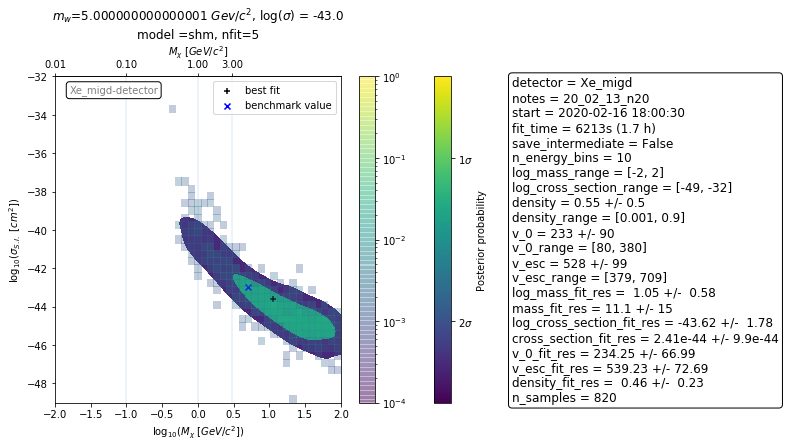

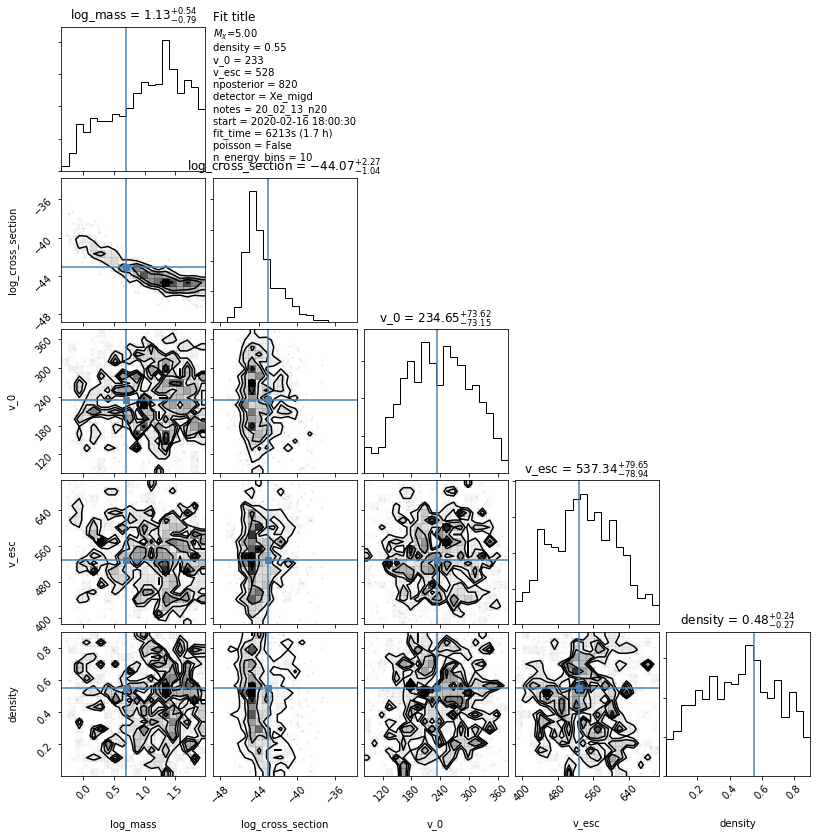

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
729  5.0         -44.0                 5               shm           300


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


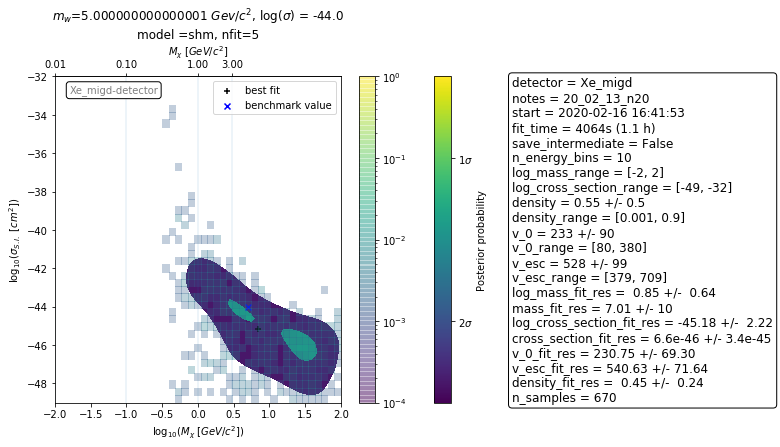

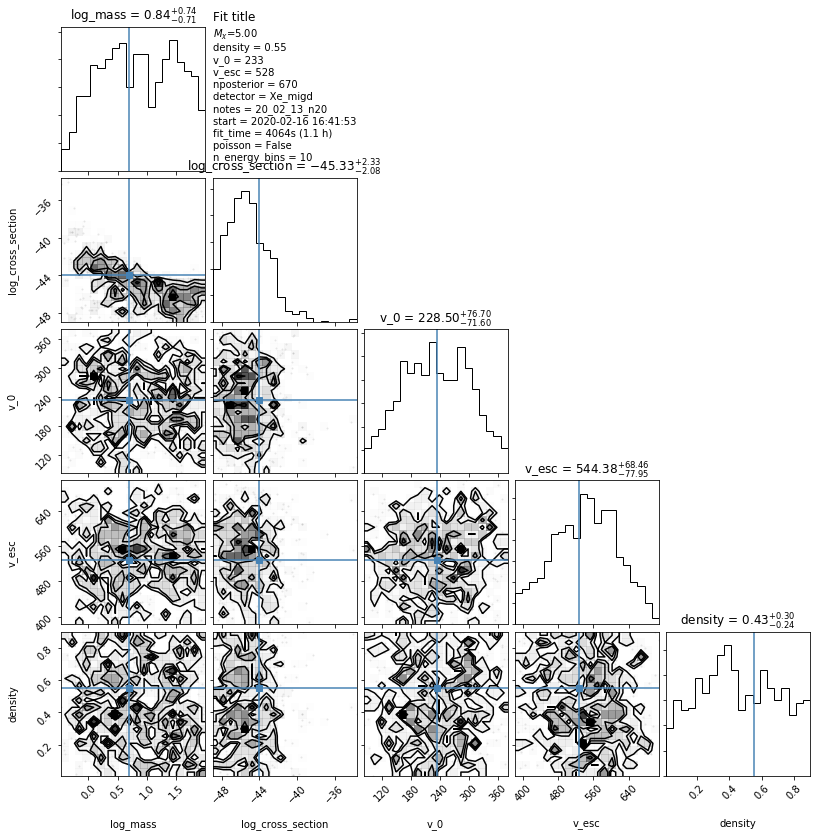

AssertionError: 

In [41]:
for k in df[mask]['item'].values:
    overlay_hist_confidence_info(k, f'{k}_{k}_')
    
assert False

No handles with labels found to put in legend.


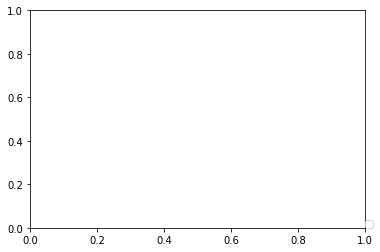

19081.75
3701.75


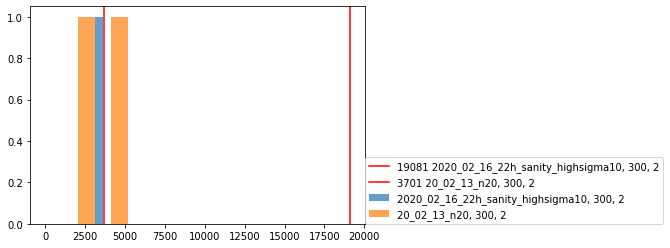

No handles with labels found to put in legend.


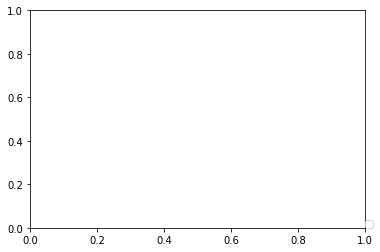

No handles with labels found to put in legend.


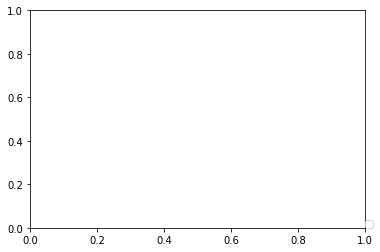

No handles with labels found to put in legend.


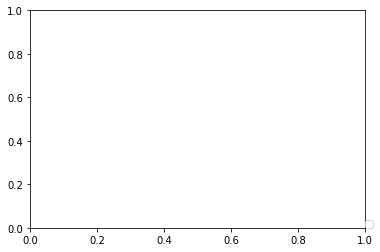

5138.5


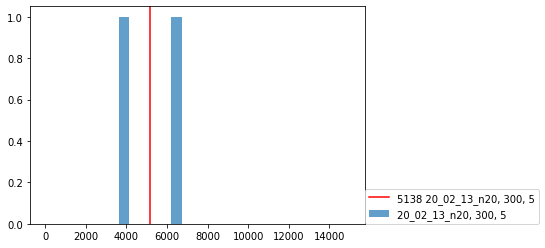

No handles with labels found to put in legend.


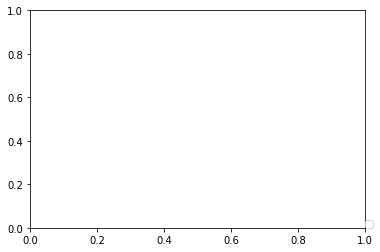

No handles with labels found to put in legend.


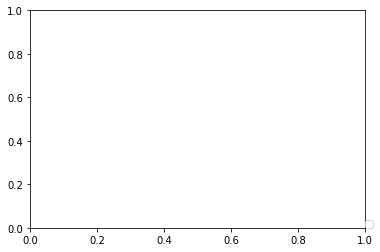

In [39]:
bins = np.linspace(0,15000,30)
for nfit in [2,5]:
    
    for nlive in [100,300,500,1000]:
        for notes in np.unique(df[mask]['config_notes'].values):
            mask3 = (df[mask]['config_nlive'] == nlive ) & (
                    df[mask]['config_notes'] == notes ) & (
                    df[mask]['n_fit_parameters' ] == nfit)
            if not np.sum(mask3):
                continue
            avg = np.mean(df[mask][mask3]['config_fit_time'].values)
            plt.axvline(avg, label = f'{int(avg)} {notes}, {nlive}, {nfit}' , c= 'r')
            print(avg)
            plt.hist(
                df[mask][mask3]['config_fit_time'].values, alpha = 0.7,
                label = f'{notes}, {nlive}, {nfit}', bins=bins) #,'config_fit_time', 'config_nlive']]
        plt.legend(loc=(1,0))
        plt.show()

In [40]:
det = 'Xe_migd'
save_dir = '2020_02_02_figs/'
def overlay_hist_confidence_info(i, save_label = ''):
    note = results[i]['config']['notes']
    this_df = df[df['item'] == i]
#     print(i, results[i]['config']['notes'],results[i]['config']['prior'])
    print(this_df[['mw', 'config_sigma', 'n_fit_parameters', 'config_halo_model', 'config_nlive']])
    
    bin_range = [results[i]['config']['prior']['log_mass']['range'], 
        results[i]['config']['prior']['log_cross_section']['range']]
    confidence_plot([i], text_box = f'{det}-detector', nsigma = 2, nbins = 50,
                   bin_range = bin_range)
    title = f'$m_w$={this_df["mw"].values[0]}'+' $Gev/c^{2}$'
    title += f', $\log(\sigma)$ = {this_df["config_sigma"].values[0]}\n'
    title += f'model ={this_df["config_halo_model"].values[0]}'
    title += f', nfit={this_df["n_fit_parameters"].values[0]}'
    plt.title(f'{title}')
    name = str(save_label)
    name += f'mw-{this_df["mw"].values[0]}_s-{this_df["config_sigma"].values[0]}_'
    name += f'{this_df["config_halo_model"].values[0]}_n-{this_df["n_fit_parameters"].values[0]}'

    combine_normalized([i], **{"alpha" : 0.3})
    info =""
#     for it,val in this_df.items():
#         if 'prior' in it:
#             print(it,val)
    for str_inf in ['detector', 'notes', 'start', 'fit_time', 'save_intermediate', 'n_energy_bins']:
        try:
            info += f"\n{str_inf} = %s" % results[i]['config'][str_inf]
            if str_inf == 'start':
                info = info[:-7]
            if str_inf == 'fit_time':
                info += 's (%.1f h)' % (results[i]['config'][str_inf] / 3600.)
        except KeyError:
            # We were trying to load something that wasn't saved in the config file, ignore it for now.
            pass
    for it, val in results[i]['config']['prior'].items():
        if it == 'k':
            continue
        if val['prior_type'] == 'gauss':
            info += f'\n{it} = {val["mean"]} +/- {val["std"]}'
        info += f'\n{it}_range = {val["range"]}'
    for it, val in results[i]['res_dict'].items():
        info += f'\n{it} = {val}'
    if '\n' == info[:1]:
        info = info[1:]
        
    ax = plt.gca()
    plt.text(1.6,1, info, transform=ax.transAxes, fontsize=12, bbox=dict(facecolor="white",
                           boxstyle="round"), verticalalignment = 'top')
#     print(info)
    if bin_range:
        plt.xlim(*bin_range[0])
        plt.ylim(*bin_range[1])
    if False:
        plt.savefig(f"{save_dir}/{name}.png", dpi =300, bbox_inches="tight")
        plt.savefig(f"{save_dir}/{name}.pdf", dpi =300, bbox_inches="tight")
        multinest_corner(results[i], save_dir + name)
    dddm.multinest_corner(results[i], save = False)
    plt.show()
    #     except:
    #         pass

In [ ]:
# mask2 = df['config_nlive'] == 500

# mask = [('20_02' in n or 'sanity' in n)  for n in df.config_notes]
mask = [('sanity' in n)  for n in df.config_notes]
df[mask]

In [ ]:
df[mask]['item'].values

In [42]:
mask = np.array(['san' in note for note in df.config_notes])
selections = [find_largest_posterior(df[mask], *sigmw) for sigmw in 
             [[-43, 5],
[-42, 5],
[-41, 5],
[-41, 1],
[-40, 1],
[-37, 0.5],
[-36, 0.5],
[-37, 0.2],
[-35, 0.2],
[-34, 0.2]]]
selections

0 0.0 0
shm for 2 pars @ s = -43, m = 5
0 0.0 0
shielded_shm for 2 pars @ s = -43, m = 5
0 0.0 0
shm for 5 pars @ s = -43, m = 5
0 0.0 0
shielded_shm for 5 pars @ s = -43, m = 5
0 0.0 0
shm for 2 pars @ s = -42, m = 5
0 0.0 0
shielded_shm for 2 pars @ s = -42, m = 5
0 0.0 0
shm for 5 pars @ s = -42, m = 5
0 0.0 0
shielded_shm for 5 pars @ s = -42, m = 5
0 0.0 0
shm for 2 pars @ s = -41, m = 5
0 0.0 0
shielded_shm for 2 pars @ s = -41, m = 5
0 0.0 0
shm for 5 pars @ s = -41, m = 5
0 0.0 0
shielded_shm for 5 pars @ s = -41, m = 5
0 0 0
shm for 2 pars @ s = -41, m = 1
     item   mw  config_sigma  config_nlive
595   599  1.0         -41.0           200
0 0.0 0
shielded_shm for 2 pars @ s = -41, m = 1
0 0 0
shm for 5 pars @ s = -41, m = 1
     item   mw  config_sigma  config_nlive
624   642  1.0         -41.0           200
0 0.0 0
shielded_shm for 5 pars @ s = -41, m = 1
0 0 0
shm for 2 pars @ s = -40, m = 1
     item   mw  config_sigma  config_nlive
626   644  1.0         -40.0           

[[], [], [], [640, 711], [654, 655], [656, 657], [778, 764], [], [], []]

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
622  1.0         -41.0                 2               shm           200
ERRRRRRRRR


[0.07739938080551749, 0.07739938080551749, 0.464396284829726]
[0.07663305 0.07739938 0.46439628]


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


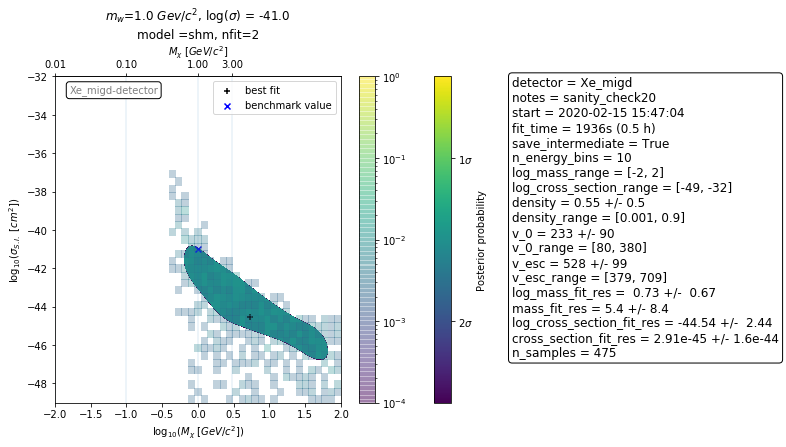

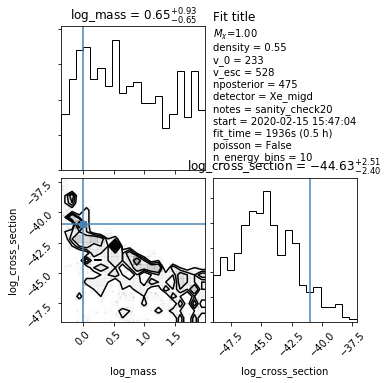

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
672  1.0         -41.0                 5               shm           500


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


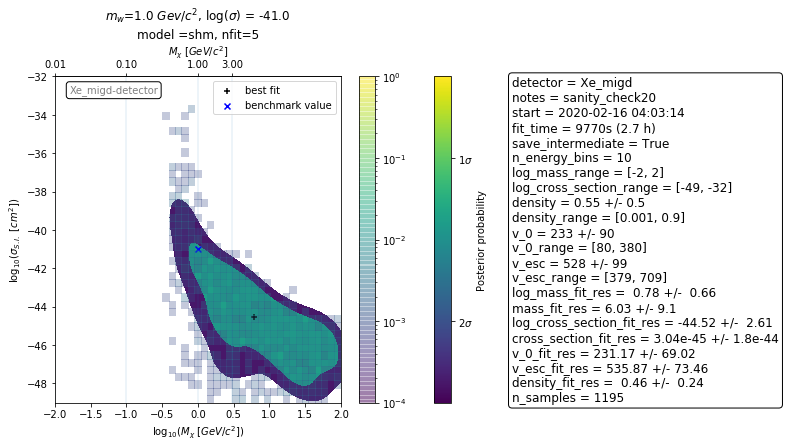

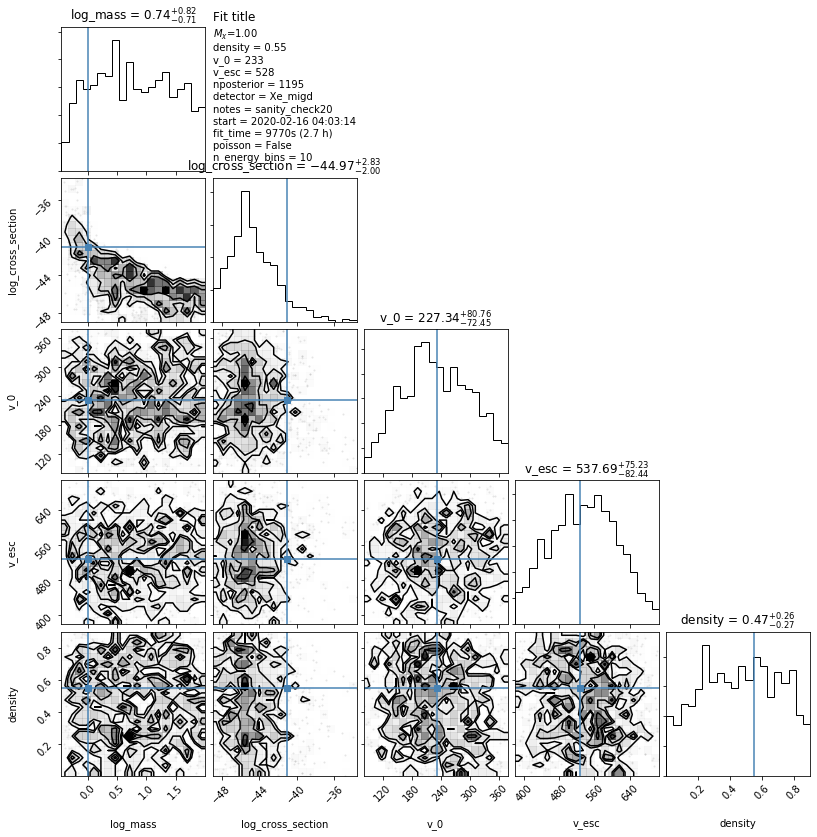

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
636  1.0         -40.0                 2               shm           500


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


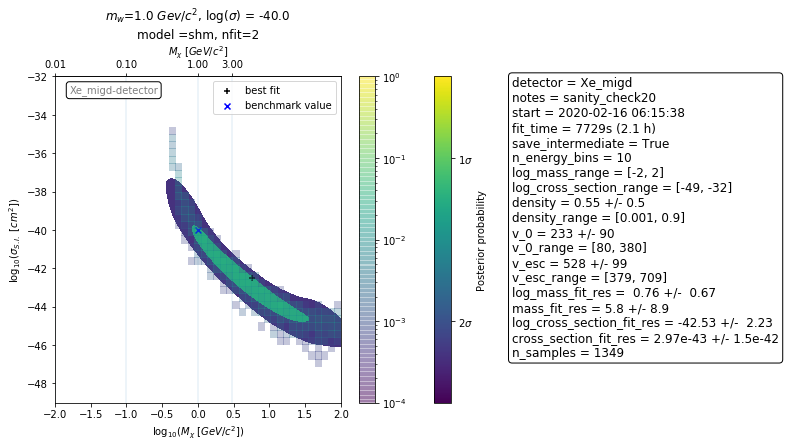

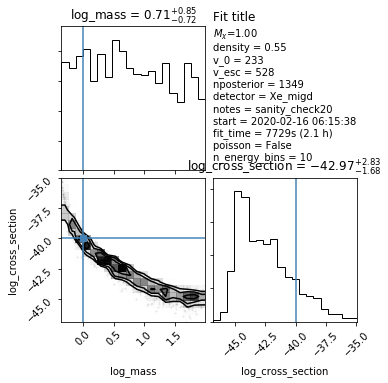

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
637  1.0         -40.0                 5               shm           500


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


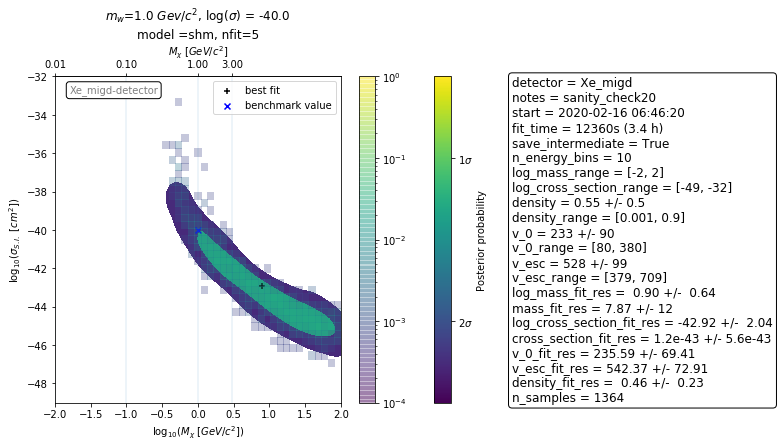

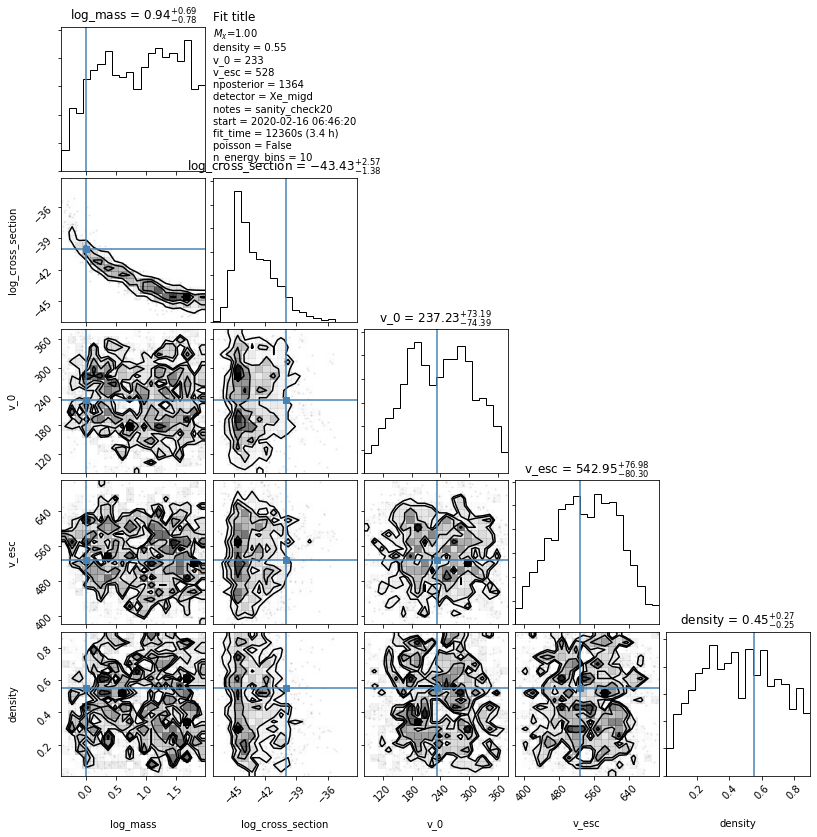

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
638  0.5         -37.0                 2               shm           500


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


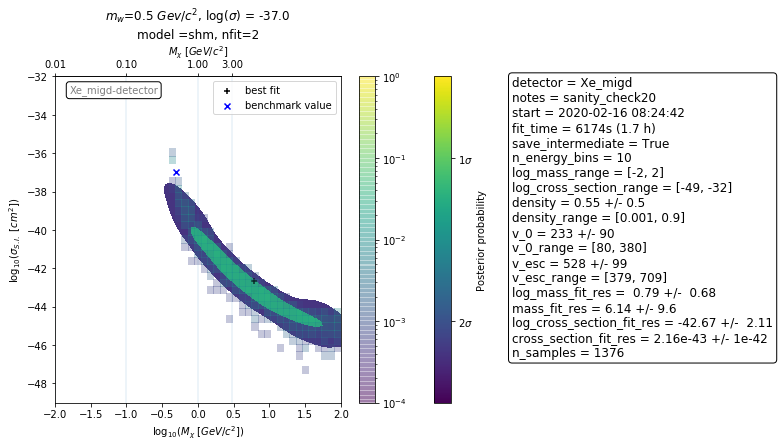

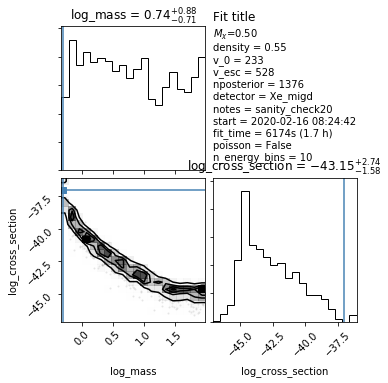

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
639  0.5         -37.0                 5               shm           500


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


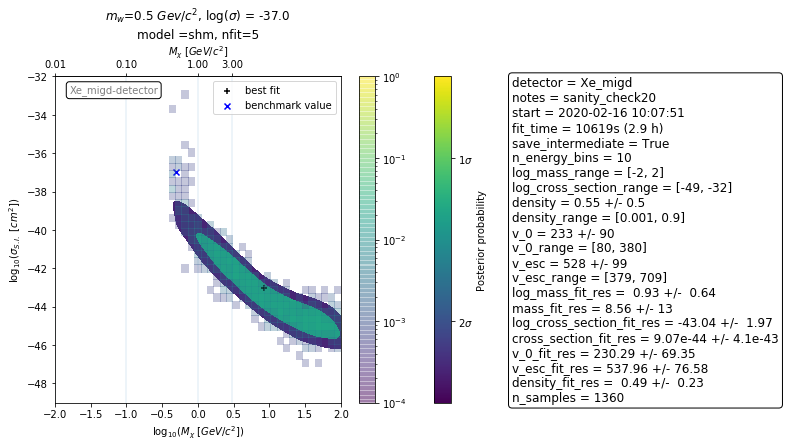

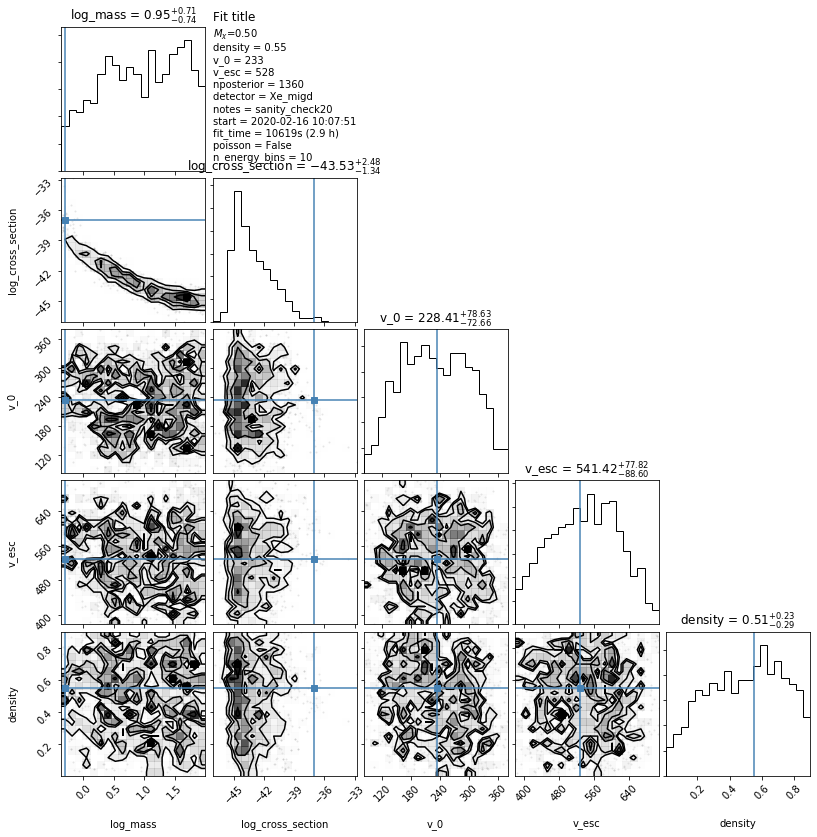

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
732  0.5         -36.0                 2               shm           500


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


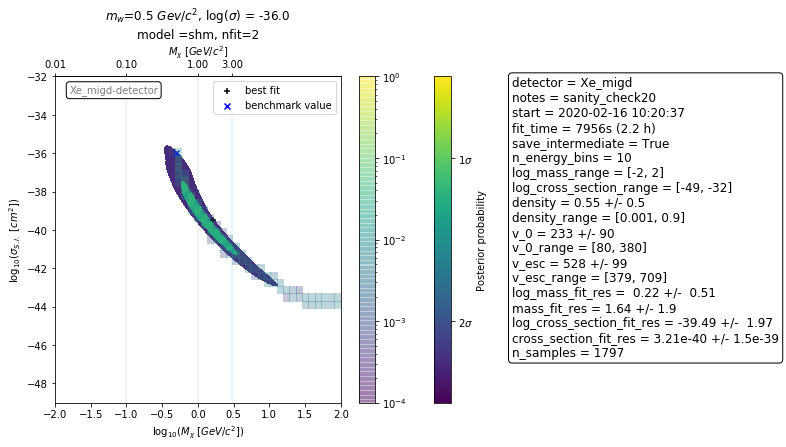

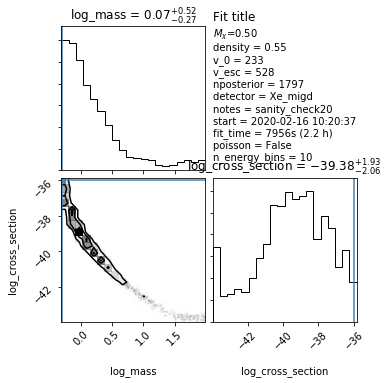

      mw  config_sigma  n_fit_parameters config_halo_model  config_nlive
720  0.5         -36.0                 5               shm           200


/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/seaborn-0.10.0-py3.8.egg/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'normed'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)
/project/xenon/jorana/software/miniconda3/envs/dddm2/lib/python3.8/site-packages/matplotlib/scale.py:144: RuntimeWarning: divide by zero encountered in log10
  return self._forward(values)


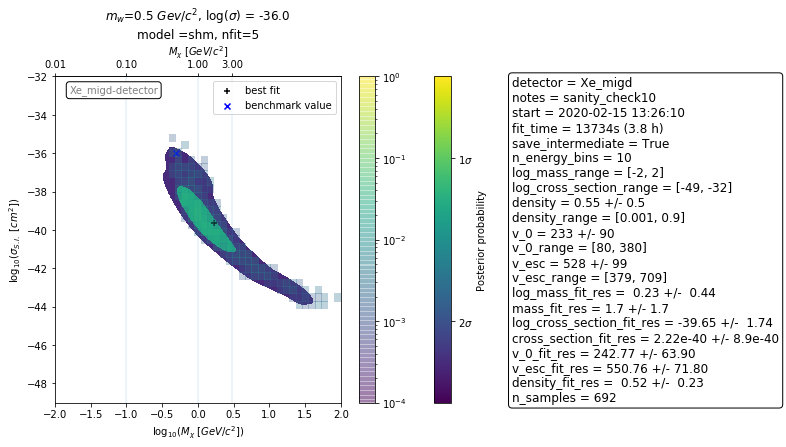

In [ ]:
for i, sel in enumerate(selections):
    for k in sel:
        overlay_hist_confidence_info(k, f'{i}_{k}_')


In [ ]:
for i, sel in enumerate(df[mask]['item'].values):
    print(sel)
#     print(df[mask][mask2][sel]['config_fit_time'])
    overlay_hist_confidence_info(sel, f'{i}_{sel}_')
#     if i>10: break

In [ ]:
for i, sel in enumerate(selections):
    print(f'-----\nSelection {i}:')
    for j, k in enumerate(sel):
        overlay_hist_confidence(k, f'{i}_{j}_')